### 1. Import Dependecies

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder

### 2. Import data

In [13]:
df = pd.read_csv("data/processed/Telco_Binning_Applied.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Newer
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Medium
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Newer
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Medium
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Newer


In [14]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_bins'],
      dtype='object')

### 3. Data Preprocessing

In [15]:
ordinal_features = ["tenure_bins"]
nominal_features = ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]
numerical_features = ["MonthlyCharges","TotalCharges"]
remainder_features = ["SeniorCitizen"] 
target_feature = "Churn"

In [16]:
numerical_transformer = Pipeline(
                                steps=[
                                    ('imputer', SimpleImputer(strategy='median')),
                                    ('scaler', StandardScaler())
                                ]
                                )

norminal_transformer = Pipeline(
                                steps=[
                                    ('imputer', SimpleImputer(
                                                            strategy='constant',
                                                            fill_value='missing'
                                                            )),
                                    ('encoder', OneHotEncoder())
                                ]
                                )

ordinal_transformer = Pipeline(
                                steps=[
                                    ('imputer', SimpleImputer(
                                                            strategy='constant',
                                                            fill_value='missing'
                                                            )),
                                    ('encoder', OrdinalEncoder())
                                ]
                                )

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_features),
        ('nom',norminal_transformer,nominal_features),
        ('ord',ordinal_transformer,ordinal_features)
    ],
    remainder='drop'
)

nominal_features_name=[]
for feature in nominal_features:
    unique_values=df[feature].unique()
    nominal_features_name.extend([f"{feature}_{val}" for val in unique_values])

df_cp = df.copy()
df_transformerd = pd.DataFrame(
    preprocessor.fit_transform(df_cp),
    columns=numerical_features+nominal_features_name+ordinal_features
)

df_remainder = df[remainder_features]
df_pp = pd.concat(
    [df_transformerd,df_remainder],
    axis=1
)

le = LabelEncoder()
df_pp[target_feature] = le.fit_transform(df_cp[target_feature])

df_pp

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_Yes,Partner_No,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaperlessBilling_No,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),tenure_bins,SeniorCitizen,Churn
0,-1.161694,-0.994194,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0,0
1,-0.260878,-0.173740,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0
2,-0.363923,-0.959649,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0,1
3,-0.747850,-0.195248,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
4,0.196178,-0.940457,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0.664868,-0.129180,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0,0
7028,1.276493,2.241056,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
7029,-1.170004,-0.854514,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0,0
7030,0.319168,-0.872095,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1,1


### 4. Saving Data

In [17]:
df = df_pp
df.to_csv("data/processed/Scalled_and_normalized_data.csv",index=False)

### 5.Handling class inbalance

In [18]:
X = df.drop(columns=['Churn'])
Y = df['Churn']

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X, Y,
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [20]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

Text(0, 0.5, 'Count')

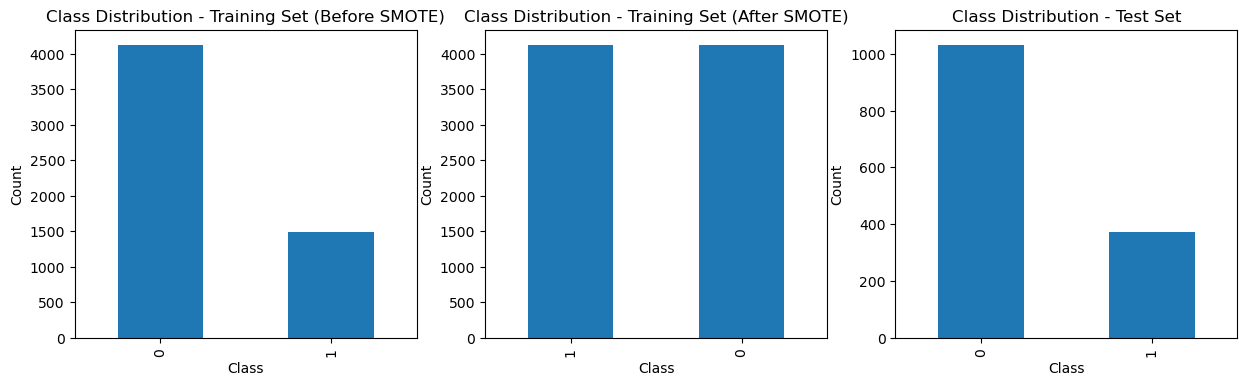

In [21]:
plt.figure(figsize=(15, 4))

# Before SMOTE
plt.subplot(131)
Y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (Before SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

# After SMOTE
plt.subplot(132)
Y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

# Test Set
plt.subplot(133)
Y_test.value_counts().plot(kind='bar')
plt.title('Class Distribution - Test Set')
plt.xlabel('Class')
plt.ylabel('Count')

In [22]:
np.savez('artifacts/X_train.npz', X_train_resampled)
np.savez('artifacts/Y_train.npz', Y_train_resampled)
np.savez('artifacts/X_test.npz', X_test)
np.savez('artifacts/Y_test.npz', Y_test)